In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Cleaned Dataset\stroke_data.csv")
df.head()

,Age,Gender,SES,Hypertension,Heart_Disease,BMI,Avg_Glucose,Diabetes,Smoking_Status,Stroke
0,66.788137,Male,Medium,1,0,25.842521,96.428681,1,Current,1
1,86.393609,Female,Medium,1,1,32.531061,133.350068,0,Never,1
2,76.158579,Female,Medium,1,0,40.681244,111.489589,0,Never,0
3,72.477870,Female,Low,0,1,33.003193,125.692465,0,Former,0
4,59.881635,Male,Low,0,0,26.062443,123.218486,1,Never,1


In [3]:
df['Age'] = df['Age'].astype(int)

In [4]:
df.head()

,Age,Gender,SES,Hypertension,Heart_Disease,BMI,Avg_Glucose,Diabetes,Smoking_Status,Stroke
0,66,Male,Medium,1,0,25.842521,96.428681,1,Current,1
1,86,Female,Medium,1,1,32.531061,133.350068,0,Never,1
2,76,Female,Medium,1,0,40.681244,111.489589,0,Never,0
3,72,Female,Low,0,1,33.003193,125.692465,0,Former,0
4,59,Male,Low,0,0,26.062443,123.218486,1,Never,1


In [5]:
from sklearn.preprocessing import OneHotEncoder

oe = OneHotEncoder(drop='first')
for col in df.select_dtypes(include='object').columns:
    df[col] = oe.fit_transform(df[[col]]).toarray()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             10000 non-null  int64  
 1   Gender          10000 non-null  float64
 2   SES             10000 non-null  float64
 3   Hypertension    10000 non-null  int64  
 4   Heart_Disease   10000 non-null  int64  
 5   BMI             10000 non-null  float64
 6   Avg_Glucose     10000 non-null  float64
 7   Diabetes        10000 non-null  int64  
 8   Smoking_Status  10000 non-null  float64
 9   Stroke          10000 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 781.4 KB


In [7]:
df.shape

(10000, 10)

In [8]:
df = df.apply(pd.to_numeric, errors='coerce')

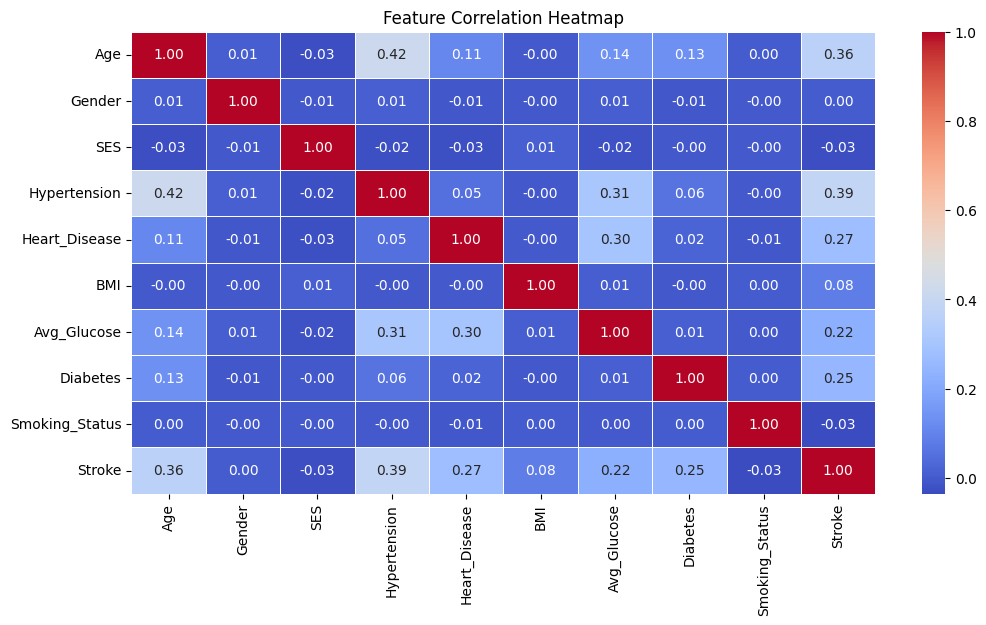

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [10]:
df.describe()

,Age,Gender,SES,Hypertension,Heart_Disease,BMI,Avg_Glucose,Diabetes,Smoking_Status,Stroke
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,69.261700,0.496300,0.287000,0.605800,0.302800,28.042252,109.115918,0.196000,0.198700,0.297800
std,9.874156,0.500011,0.452384,0.488703,0.459492,4.901424,16.421142,0.396988,0.399042,0.457314
min,27.000000,0.000000,0.000000,0.000000,0.000000,15.037988,45.569135,0.000000,0.000000,0.000000
25%,63.000000,0.000000,0.000000,0.000000,0.000000,24.660786,98.188349,0.000000,0.000000,0.000000
50%,69.000000,0.000000,0.000000,1.000000,0.000000,28.066932,109.022208,0.000000,0.000000,0.000000
75%,76.000000,1.000000,1.000000,1.000000,1.000000,31.390170,120.341179,0.000000,0.000000,1.000000
max,99.000000,1.000000,1.000000,1.000000,1.000000,47.495955,176.180688,1.000000,1.000000,1.000000


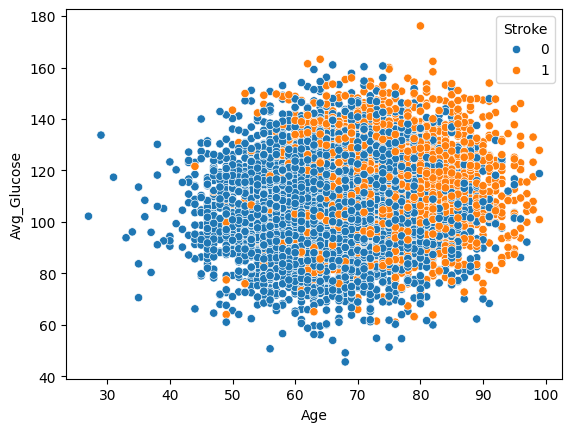

In [11]:
sns.scatterplot(data=df, x='Age', y='Avg_Glucose', hue='Stroke')
plt.show()

In [12]:
df['Stroke'].value_counts()

Stroke
0    7022
1    2978
Name: count, dtype: int64

In [13]:
x = df[['Age', 'Avg_Glucose']]
y = df['Stroke']

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

In [15]:
from sklearn.naive_bayes import GaussianNB

gb = GaussianNB()
gb.fit(x_train, y_train)

GaussianNB()

In [16]:
gb.score(x_test, y_test)*100

73.7

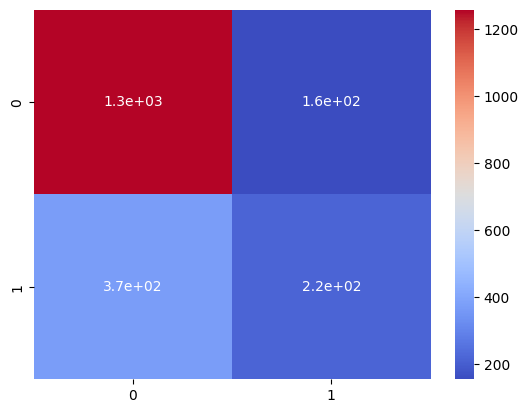

In [17]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, gb.predict(x_test))
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

In [18]:
print(f"precision score: {precision_score(y_test, gb.predict(x_test))*100:.2f}")
print(f"recall score: {recall_score(y_test, gb.predict(x_test))*100:.2f}")
print(f"f1 score: {f1_score(y_test, gb.predict(x_test))*100:.2f}")

precision score: 58.22
recall score: 36.80
f1 score: 45.09


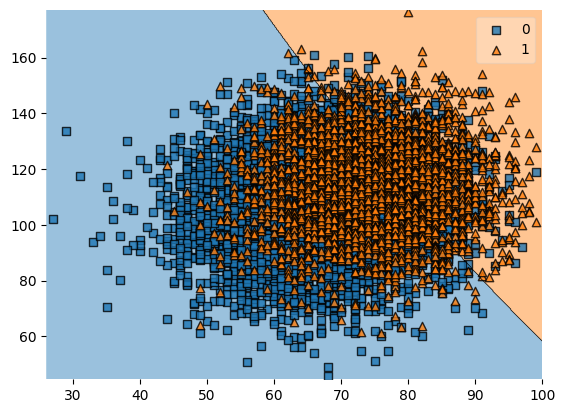

In [19]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=gb)
plt.show()

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [21]:
dt.score(x_test, y_test)*100

63.4

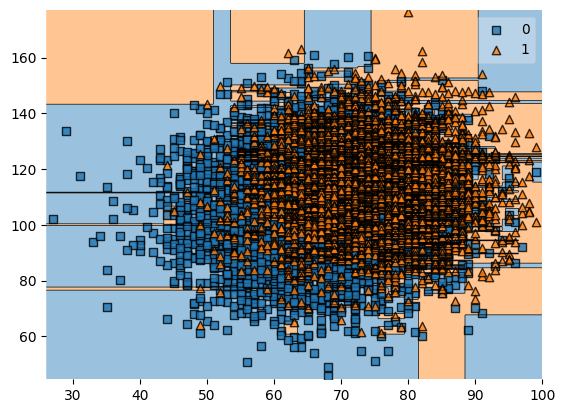

In [22]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dt)
plt.show()